# Stat 101 - WFR 2 Group 4 Data Project 1 Analysis

This work is a quick descriptive analysis from a survey conducted by Group 4 of Stat 101 - WFR 2 class. The survey consists of a set of questions that asks on the discrepancy between budget allocations, savings, and budgetting system of dormers and non-dormers.

As this analysis is written in a Jupyter notebook, the following lines of code may look gibberish to non-coding people so I would suggest to only look on the data, graphs, and analyses provided on each step done.

## Terms and Definitions

As you skim by the analyses and graphs, there might be terminologies you might come come across that are not taught on our Stat 101 class. Given below are some terms and their corresponding definitions.

**Dataset** - we will refer to this as the data collected from the survey

**Feature** - refers to the name of a column from the dataset (e.g. `Timestamp`, `Year Level`)

**Record/Instance** - refers to a row in the dataset

**Library** - a compilation of code that works to produce a specific set of interrelated actions (e.g. think of a house cleaner that can clean a house. the cleaner can clean the bathroom, wash the dishes, and broom the living room, the house cleaner here is a "library" that does a set of actions that are interrelated)

**Function** - just like in Algebra, refers to a mapping for some value/s `X` to another set of value/s `Y`

**Method** - refers to a function that is particular for a library

**Strings** - a set of concatenated characters

**NULL** - a non-existing value

**Impute** - action of replacing `NULL` values with non-null values based from the available values from the dataset

## Setup

In order to perform data analysis, we would first need to import libraries that are essential for the analysis.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

We will do a quick check on the tabular format and first five values of the CSV (comma-separated value) file.

In [2]:
df = pd.read_csv('./data/Budget Survey (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,"In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes.",Please indicate your student number.,Year Level,College,Course,How much is your average weekly allowance?,Are you currently residing outside of your permanent residence? (dorm/apartment/condominium),"How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Miscellaneous]",Do you get to save by the end of the week?,"Are you satisfied with your budget system? (Achieving budget satisfaction means comfortably covering essentials, enjoying discretionary spending, and saving for future goals.)"
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of Engineering,BS Mechanical Engineering,1.000000e-07,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata School of Business,BA Business Administration,1.500000e+03,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2nd year,College of Science,BS Geology,1.000000e+03,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2nd,School of Economics,BS Economics,3.000000e+03,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1at,College of Home Economics,BS Clothing Technology,1.100000e+03,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


Since the Pandas library has built-in implementations for standard statistical summary measures (e.g. mean, media, max, min), we will try to describe each feature by taking its summary measures. Note that there are categorical features in our dataset so we first describe features that are mathematically computable.

In [3]:
df.describe()

,How much is your average weekly allowance?
count,2.500000e+01
mean,1.646000e+03
std,9.237514e+02
min,1.000000e-07
25%,1.000000e+03
50%,1.500000e+03
75%,2.000000e+03
max,3.500000e+03


From the above line, we can see that there is only one numerical feature (average weekly allowance).

We'll do the same for the categorical features. But this time, the `describe()` method will only include those with values that can be considered as strings and the summary measures here include the total count of all non-NULL values for that specific feature, the amount of unique values, the most frequent value, and the corresponding frequency of that value.

In [4]:
df.describe(include='object')

,Timestamp,"In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes.",Please indicate your student number.,Year Level,College,Course,Are you currently residing outside of your permanent residence? (dorm/apartment/condominium),"How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]","How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Miscellaneous]",Do you get to save by the end of the week?,"Are you satisfied with your budget system? (Achieving budget satisfaction means comfortably covering essentials, enjoying discretionary spending, and saving for future goals.)"
count,25,25,25,25,25,25,25,25,25,25,25,25,25
unique,25,1,24,16,11,22,2,3,4,4,2,2,3
top,10/1/2023 9:18:56,Yes,2022-00288,2nd Year,College of Engineering,BS Economics,Yes,Very High Priority,High Priority,Low Priority,Very Low Priority,Yes,Moderately Satisfied
freq,1,25,2,4,6,2,13,14,10,12,19,20,15


We can also do a quick check on the `NULL` values from our dataset to see if we would need to impute values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                            --------------  -----  
 0   Timestamp                                                                                                                                                                                                         25 non-null     object 
 1   In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organ

As we can see, all features contain 25 non-null values which means there is no need to impute values in our dataset.

## Data Preprocessing

The next step for every analysis is to preprocess our data to have a simpler and readable table.

We will simplify feature names by replacing the `columns` property of the dataframe.

In [6]:
df.columns

Index(['Timestamp',
       'In accordance with RA 10173 or the Data Privacy Act of 2012, all personal information gathered from this form shall be kept confidential and will only be accessed by the organizers for registration purposes. ',
       'Please indicate your student number.', 'Year Level', 'College',
       'Course', 'How much is your average weekly allowance?',
       'Are you currently residing outside of your permanent residence? (dorm/apartment/condominium)',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Food]',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Transportation]',
       'How would you rank where to allocate your budget among the following? (Food, Transportation, Personal Expenses, Miscellaneous) [Personal Expenses]',
       'How would you rank where to allocate your budget among the f

In [7]:
df.columns = [
    'timestamp',
    'data_privacy',
    'student_number',
    'year_level',
    'college',
    'course',
    'average_weekly_allowance',
    'dorm_residency',
    'food_allocation_prioritization',
    'transportation_allocation_prioritization',
    'personal_expense_allocation_prioritization',
    'misc_allocation_prioritization',
    'weekly_savings',
    'budgetting_system_satisfaction',
]

In [8]:
df.head()

,timestamp,data_privacy,student_number,year_level,college,course,average_weekly_allowance,dorm_residency,food_allocation_prioritization,transportation_allocation_prioritization,personal_expense_allocation_prioritization,misc_allocation_prioritization,weekly_savings,budgetting_system_satisfaction
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of Engineering,BS Mechanical Engineering,1.000000e-07,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata School of Business,BA Business Administration,1.500000e+03,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2nd year,College of Science,BS Geology,1.000000e+03,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2nd,School of Economics,BS Economics,3.000000e+03,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1at,College of Home Economics,BS Clothing Technology,1.100000e+03,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


As we can see, the feature names of our dataset have been changed. The next thing that we can do is inspect the features for inconsistencies.

Note that we don't need to inspect every feature as we can already conclude something based from our previous `describe()` and `info()` analysis.

### Timestamp

The `timestamp` feature won't be as impactful as it would be since the survey isn't a time-series survey.

### Data Privacy

Note that we can see the number of unique values from the `describe()` call done above for every categorical feature. As you'll see, there is only one response for this feature so we will skip this feature.

### Student Number

Again, we utilize the `describe()` call done above. This time, instead of only having one value, we have 25 unique values. Again, this won't be representative of any analysis that we'll benefit from and it is also a unique identifier for all Stat 101 WFR 2 students.

If there is ever a duplicate student number, we can drop any of the two unless the two records have different responses.

### Year Level

We first check the unique values for our year level feature.

In [9]:
df['year_level'].unique()

array(['2', '1', '2nd year', '2nd', '1at', '3rd year', 'IV', '2nd Year',
       '5th', 'Third', 'Sophomore ', '4th', '5th Year', '3rd', '3rd Year',
       '2ND YEAR'], dtype=object)

It is noticeable that there are different values on our dataset so one thing we can do is apply a mapping method to make the values in this feature consistent (note that `2nd year` is equivalent to `Sophomore` and `2ND YEAR`).

In [10]:
year_level_mapper = {
    '1': 1,
    '1at': 1,
    '2': 2,
    '2nd': 2,
    '2ND YEAR': 2,
    '2nd year': 2,
    '2nd Year': 2,
    'Sophomore ': 2,
    '3rd': 3,
    '3rd year': 3,
    '3rd Year': 3,
    'Third': 3,
    'IV': 4,
    '4th': 4,
    '5th Year': 5,
    '5th': 5,
}

In [11]:
df['year_level'] = df['year_level'].map(year_level_mapper)

In [12]:
df['year_level'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

After the transformation, we can see that we only have five unique values left which is better for our analysis.

### College

We copy the same process done above.

In [13]:
df['college'].unique()

array(['College of Engineering', 'Virata School of Business',
       'College of Science', 'School of Economics',
       'College of Home Economics', 'College of Architecture',
       'Asian Institute of Tourism', 'College of Human Kinetics', 'NCPAG',
       'College of Education ', 'COLLEGE OF HOME ECONOMICS'], dtype=object)

If we carefully check, there are similar instances for `College of Home Econommics` but with varying capitalizations. Again, we transform this feature by following a capitalized version of all strings in that feature.

In [14]:
df['college'] = df['college'].str.capitalize()

In [15]:
df['college'].unique()

array(['College of engineering', 'Virata school of business',
       'College of science', 'School of economics',
       'College of home economics', 'College of architecture',
       'Asian institute of tourism', 'College of human kinetics', 'Ncpag',
       'College of education '], dtype=object)

As we can see, the capitalizations are now uniform and there's no repeating values.

### Course

Again, we copy the same process as above.

In [16]:
df['course'].unique()

array(['BS Mechanical Engineering', 'BA Business Administration',
       'BS Geology', 'BS Economics', 'BS Clothing Technology',
       'B Landscape Architecture', 'BS Tourism', 'BS Computer Science',
       'B Sport Science', 'BS Business Economics',
       'BS Geodetic Engineering', 'B Public Administration',
       'BS Molecular Biology and Biotechnology ',
       'BS Community Nutrition', 'B Sports Science',
       'B Secondary Education ', 'BS Interior Design',
       'BS Chemical Engineering', 'Non-Major', 'BS Geodetic Engineering ',
       'AA Sports Studies', 'BS INTERIOR DESIGN'], dtype=object)

Again, there are two `BS Interior Design` values that have different capitalizations.

In [17]:
df['course'] = df['course'].str.capitalize()

In [18]:
df['college'].unique()

array(['College of engineering', 'Virata school of business',
       'College of science', 'School of economics',
       'College of home economics', 'College of architecture',
       'Asian institute of tourism', 'College of human kinetics', 'Ncpag',
       'College of education '], dtype=object)

After transformation, the values are now distinct from one another.

### Average Weekly Allowance

Note from the very first table of this notebook, there's a weird floating point value in our `average_weekly_allowance` feature. Note that in Pandas, we can change the data type of a value/feature into an integer value to avoid floating point precision errors.

In [19]:
df['average_weekly_allowance'] = df['average_weekly_allowance'].astype('int32')

In [20]:
df.head()

,timestamp,data_privacy,student_number,year_level,college,course,average_weekly_allowance,dorm_residency,food_allocation_prioritization,transportation_allocation_prioritization,personal_expense_allocation_prioritization,misc_allocation_prioritization,weekly_savings,budgetting_system_satisfaction
0,10/1/2023 9:18:56,Yes,2022-12666,2,College of engineering,Bs mechanical engineering,0,No,Very High Priority,High Priority,Very Low Priority,Low Priority,Yes,Completely Satisfied
1,10/1/2023 14:25:12,Yes,2022-07299,1,Virata school of business,Ba business administration,1500,Yes,Very High Priority,Low Priority,High Priority,Very Low Priority,Yes,Moderately Satisfied
2,10/1/2023 21:49:30,Yes,2021-21191,2,College of science,Bs geology,1000,No,High Priority,Very High Priority,Very Low Priority,Low Priority,Yes,Moderately Satisfied
3,10/1/2023 22:58:27,Yes,2022-06241,2,School of economics,Bs economics,3000,No,High Priority,Very Low Priority,Very High Priority,Low Priority,Yes,Completely Satisfied
4,10/2/2023 10:25:59,Yes,2021-05731,1,College of home economics,Bs clothing technology,1100,No,Low Priority,Very High Priority,High Priority,Very Low Priority,No,Moderately Satisfied


As we can see, all values in the `average_weekly_allowance` are now transformed into a 32-bit integer data type.

### Remaining Features

Note that the remaining features aren't manually inputted by the user so there would be no errors in input descriptions. One can validate this that all inputs are indeed within the range of all possible values for all feature.

## Data Analysis

### Demographic Analysis

Before we start things off, we can do a quick demographic analysis on Stat 101 - WFR 2 students.

### College

We will utilize a horizontal bar chart to check the college with the most students in Stat 101 WFR 2.

In [21]:
df.groupby(['college']).size()

college
Asian institute of tourism    1
College of architecture       1
College of education          1
College of engineering        6
College of home economics     5
College of human kinetics     3
College of science            2
Ncpag                         1
School of economics           4
Virata school of business     1
dtype: int64

In [22]:
college_group = df.groupby(['college']).size().reset_index()
college_group.set_index('college', drop=True, inplace=True)

In [23]:
college_group.index

Index(['Asian institute of tourism', 'College of architecture',
       'College of education ', 'College of engineering',
       'College of home economics', 'College of human kinetics',
       'College of science', 'Ncpag', 'School of economics',
       'Virata school of business'],
      dtype='object', name='college')

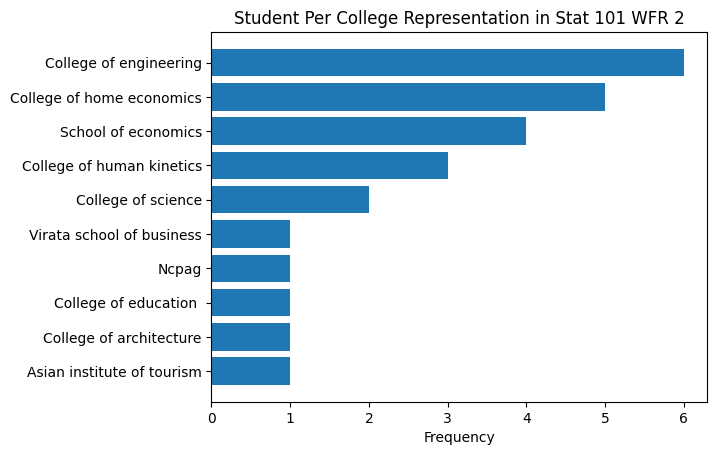

In [24]:
college_data = sorted(zip(college_group.index, df.groupby(['college']).size()), key=lambda x: x[1], reverse=False)
categs, values = zip(*college_data)
plt.barh(categs, values)
plt.xlabel("Frequency")
plt.title("Student Per College Representation in Stat 101 WFR 2")
plt.show()

As we can see, the College of Engineering has the most students.

### Year Level

In [25]:
df.groupby(['year_level']).size()

year_level
1     2
2    14
3     4
4     3
5     2
dtype: int64

In [26]:
year_level_group = df.groupby(['year_level']).size().reset_index()
year_level_group.set_index('year_level', drop=True, inplace=True)

In [27]:
year_level_group.index = year_level_group.index.astype('object')

In [28]:
year_level_group.columns = ['count']

In [29]:
year_level_group['count']

year_level
1     2
2    14
3     4
4     3
5     2
Name: count, dtype: int64

In [30]:
year_level_group.index.dtype

dtype('O')

[(2, 14), (3, 4), (4, 3), (1, 2), (5, 2)]


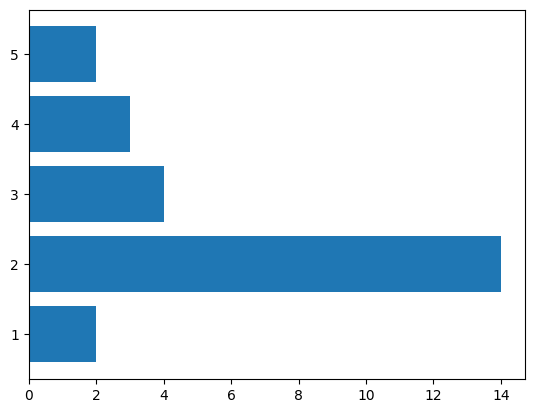

In [31]:
year_level_data = sorted(zip(year_level_group.index, year_level_group['count']), key=lambda x: x[1], reverse=True)
print(year_level_data)
categs, values = zip(*year_level_data)
plt.barh(categs, values,)
plt.show()

Note that we are having a problem with our barchart as it sorts our data by using the index.

In [32]:
year_level_group.index

Index([1, 2, 3, 4, 5], dtype='object', name='year_level')

In [33]:
year_level_group.index = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

In [34]:
year_level_group

,count
First,2
Second,14
Third,4
Fourth,3
Fifth,2


[('First', 2), ('Fifth', 2), ('Fourth', 3), ('Third', 4), ('Second', 14)]


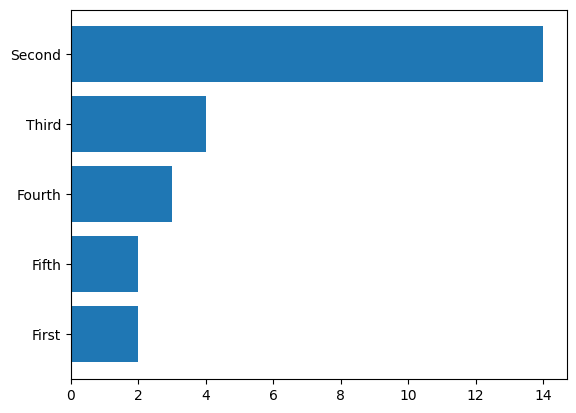

In [35]:
year_level_data = sorted(zip(year_level_group.index, year_level_group['count']), key=lambda x: x[1], reverse=False)
print(year_level_data)
categs, values = zip(*year_level_data)
plt.barh(categs, values)
plt.show()

After index transformation, we can see that most of the students in our class consists of second year students.

### Course

We can also do a quick `course` check.

In [36]:
df.groupby(['course']).size()

course
Aa sports studies                          1
B landscape architecture                   1
B public administration                    1
B secondary education                      1
B sport science                            1
B sports science                           1
Ba business administration                 1
Bs business economics                      2
Bs chemical engineering                    1
Bs clothing technology                     1
Bs community nutrition                     2
Bs computer science                        1
Bs economics                               2
Bs geodetic engineering                    1
Bs geodetic engineering                    1
Bs geology                                 1
Bs interior design                         2
Bs mechanical engineering                  1
Bs molecular biology and biotechnology     1
Bs tourism                                 1
Non-major                                  1
dtype: int64

As we can see, the courses are pretty varied. The values are either 1 or 2.

Before we proceed with our analysis proper, note that the following analyses are comparisons between available features for both dormers and non-dormers.

## Dormers and Non-dormers

In [21]:
df.groupby(['dorm_residency']).size().tolist()

[12, 13]

In [22]:
df['dorm_residency'].unique().tolist()

['No', 'Yes']

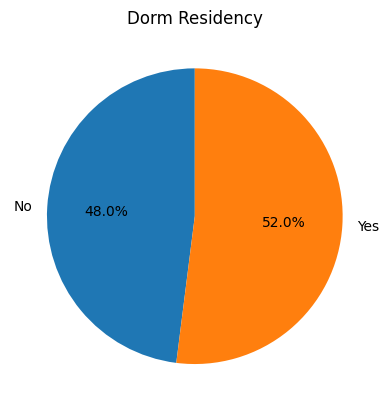

In [27]:
plt.pie(x=df.groupby(['dorm_residency']).size().tolist(), labels=df['dorm_residency'].unique().tolist(),  autopct='%1.1f%%', startangle=90)
plt.title("Dorm Residency")
plt.show()

As we can see from the above pie chart, there is a good cut between dormers and non-dormers for the Stat 101 WFR-2 class.

### Average Weekly Allowance

Now, we perform discrepancies between the average weekly allowance of dormers and non-dormers.

Before that, let's first check the data as a whole.

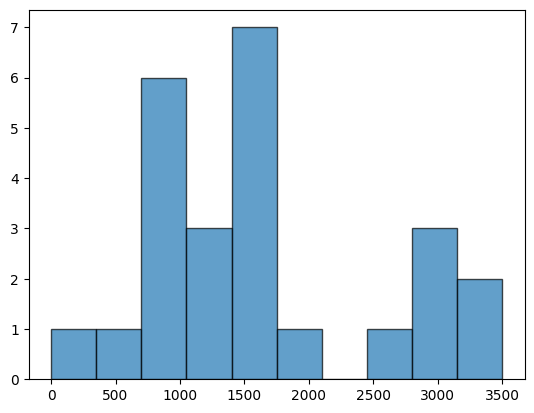

In [44]:
plt.hist(df['average_weekly_allowance'], edgecolor='black', alpha=0.7)
plt.show()

In [45]:
df.groupby(['average_weekly_allowance']).size().reset_index()

,average_weekly_allowance,0
0,0,1
1,500,1
2,1000,6
3,1100,1
4,1250,1
5,1300,1
6,1500,7
7,2000,1
8,2500,1
9,3000,3


In [46]:
average_weekly_allowance = df.groupby(['average_weekly_allowance']).size().reset_index()
average_weekly_allowance.set_index('average_weekly_allowance')

,0
average_weekly_allowance,
0,1
500,1
1000,6
1100,1
1250,1
1300,1
1500,7
2000,1
2500,1


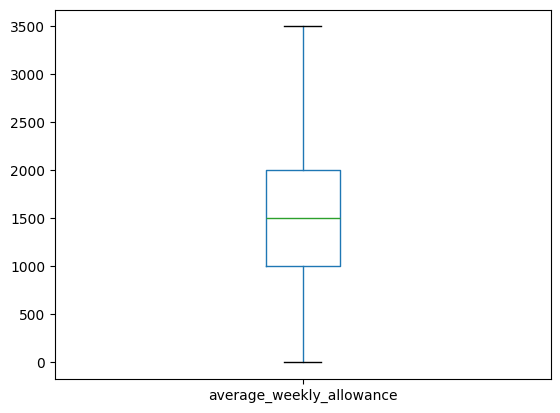

In [47]:
df.boxplot(column=['average_weekly_allowance'])
plt.grid(False)
plt.show()

The boxplot above shows that there are no outliers in average weekly allowance feature because all of the values in the dataset are within 3 standard deviations from the median but note that it is quite interesting that the minimum value for the average weekly allowance is 0 for someone who is not residing on any dormitory near UP Diliman.

The boxplot above also shows that the median value is at Php1500 and most of the input values are within the range Php1000 and Php2000.

Now we perform cross tabulation between dormers and non-dormers.

In [48]:
df.groupby(['dorm_residency']).agg({
    'average_weekly_allowance': 'mean'
})

,average_weekly_allowance
dorm_residency,
No,1679.166667
Yes,1615.384615


From the above grouping, we can see that the weekly allowance of non-dormers are slightly higher compared to dormers.

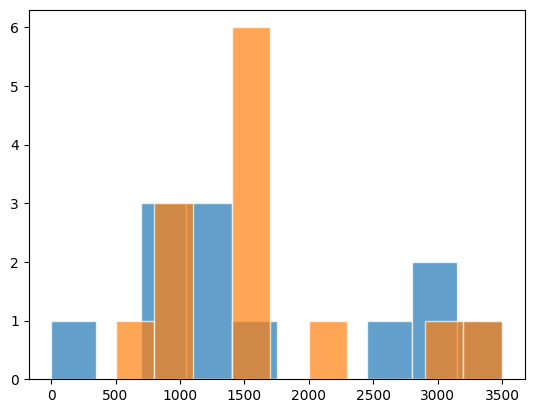

In [53]:
plt.hist(df[df['dorm_residency'] == 'No']['average_weekly_allowance'], edgecolor='white', alpha=0.7)
plt.hist(df[df['dorm_residency'] == 'Yes']['average_weekly_allowance'], edgecolor='white', alpha=0.7)
plt.show()

The histograms above doesn't really look good but the amount of non-dormers that has allowance beyond Php2000 are more frequent compared to dormers.

## Expenditure Allocation

Note that the labels for the `*_allocation_prioritization` features utilizes categorical values.

Before we provide insights between budget allocation of dormers and non-dormers, let us first take a quick insight of the whole dataset by graphing the prioritization of each category.

### Food Allocation Prioritization

In [66]:
food_alloc = df.groupby('food_allocation_prioritization').size().reset_index()
food_alloc.set_index('food_allocation_prioritization', drop=True, inplace=True)
food_alloc.columns = ['count']

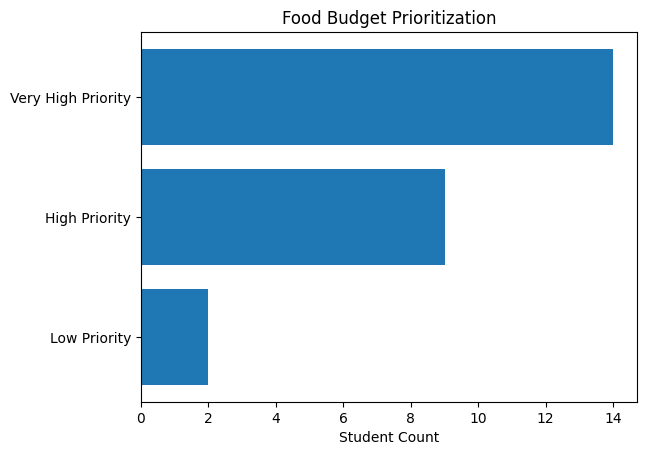

In [68]:
food_prio_data = sorted(zip(food_alloc.index, food_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*food_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Food Budget Prioritization')
plt.show()

### Transportation Allocation Prioritization

In [69]:
transpo_alloc = df.groupby('transportation_allocation_prioritization').size().reset_index()
transpo_alloc.set_index('transportation_allocation_prioritization', drop=True, inplace=True)
transpo_alloc.columns = ['count']

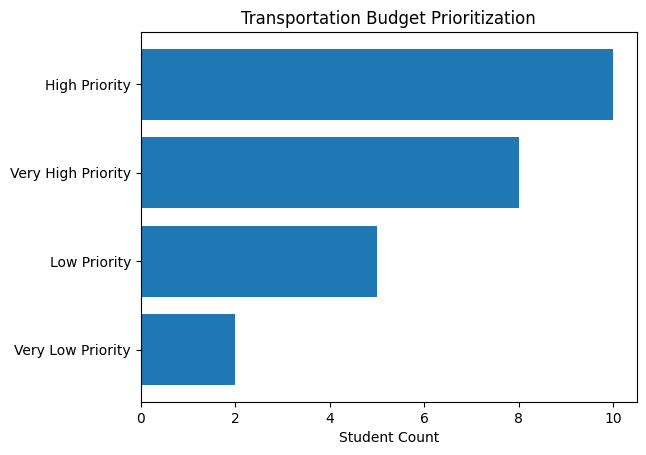

In [70]:
transpo_prio_data = sorted(zip(transpo_alloc.index, transpo_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*transpo_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Transportation Budget Prioritization')
plt.show()

### Personal Expenses Allocation Prioritization

In [71]:
personal_expense_alloc = df.groupby('personal_expense_allocation_prioritization').size().reset_index()
personal_expense_alloc.set_index('personal_expense_allocation_prioritization', drop=True, inplace=True)
personal_expense_alloc.columns = ['count']

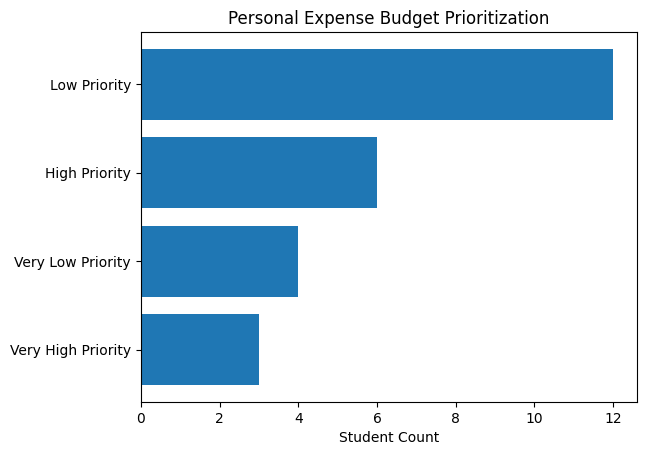

In [72]:
personal_expense_prio_data = sorted(zip(personal_expense_alloc.index, personal_expense_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*personal_expense_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Personal Expense Budget Prioritization')
plt.show()

### Miscellaneous Allocation Prioritization

In [73]:
misc_alloc = df.groupby('misc_allocation_prioritization').size().reset_index()
misc_alloc.set_index('misc_allocation_prioritization', drop=True, inplace=True)
misc_alloc.columns = ['count']

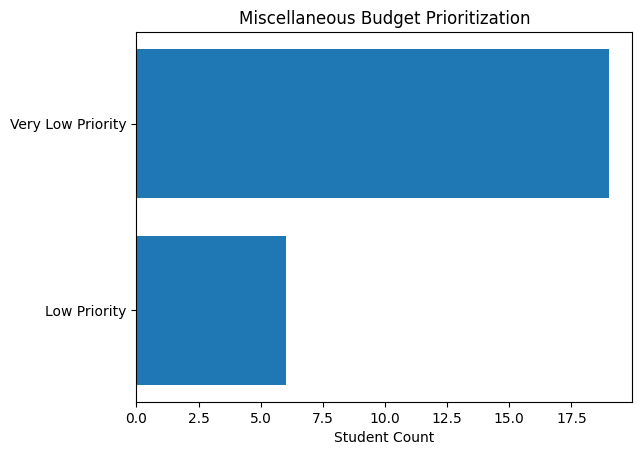

In [75]:
misc_prio_data = sorted(zip(misc_alloc.index, misc_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*misc_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Miscellaneous Budget Prioritization')
plt.show()

From the bar graphs shown above, we can see a clear cut prioritization on how students of Stat 101 WFR - 2 allocate their budget. There are no ties between labels which could result on conflicts on which allocation is better as the labels for the feature are all categorical.

We now check if this is still true for both dormers and non-dormers.

### Dormers

#### Food Allocation Prioritization

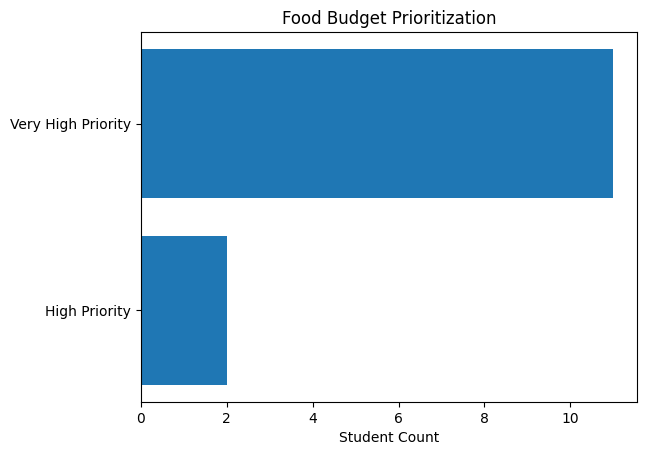

In [76]:
food_alloc = df[df['dorm_residency'] == 'Yes'].groupby('food_allocation_prioritization').size().reset_index()
food_alloc.set_index('food_allocation_prioritization', drop=True, inplace=True)
food_alloc.columns = ['count']
food_prio_data = sorted(zip(food_alloc.index, food_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*food_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Food Budget Prioritization')
plt.show()

#### Transportation Allocation Prioritization

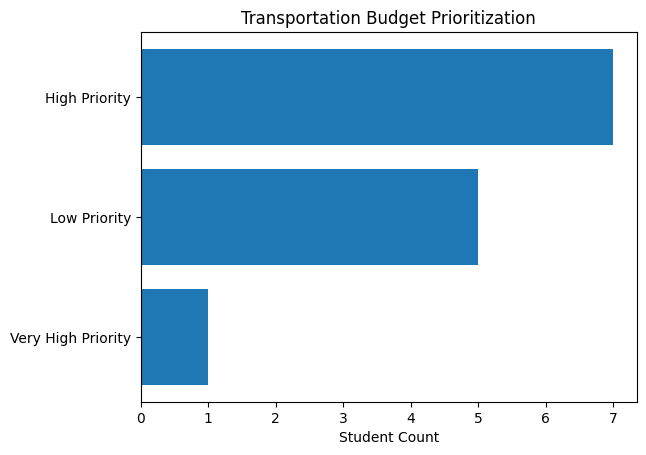

In [77]:
transpo_alloc = df[df['dorm_residency'] == 'Yes'].groupby('transportation_allocation_prioritization').size().reset_index()
transpo_alloc.set_index('transportation_allocation_prioritization', drop=True, inplace=True)
transpo_alloc.columns = ['count']
transpo_prio_data = sorted(zip(transpo_alloc.index, transpo_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*transpo_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Transportation Budget Prioritization')
plt.show()

#### Personal Expense Allocation Prioritization

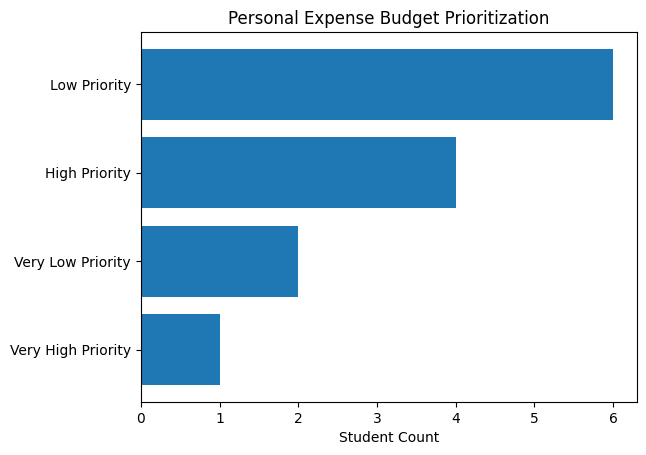

In [78]:
personal_expense_alloc = df[df['dorm_residency'] == 'Yes'].groupby('personal_expense_allocation_prioritization').size().reset_index()
personal_expense_alloc.set_index('personal_expense_allocation_prioritization', drop=True, inplace=True)
personal_expense_alloc.columns = ['count']
personal_expense_prio_data = sorted(zip(personal_expense_alloc.index, personal_expense_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*personal_expense_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Personal Expense Budget Prioritization')
plt.show()

#### Miscellaneous Expense Allocation Prioritization

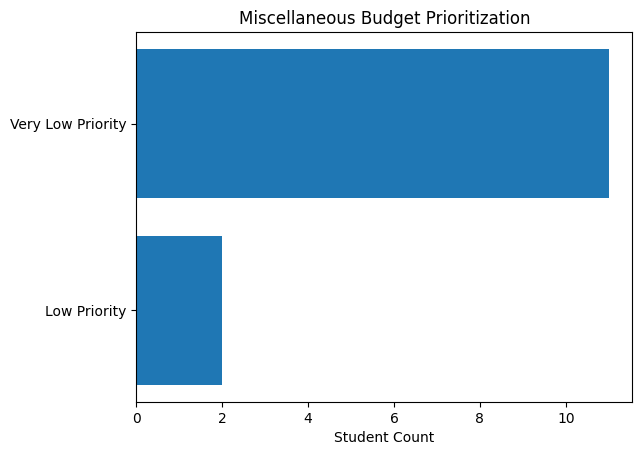

In [79]:
misc_alloc = df[df['dorm_residency'] == 'Yes'].groupby('misc_allocation_prioritization').size().reset_index()
misc_alloc.set_index('misc_allocation_prioritization', drop=True, inplace=True)
misc_alloc.columns = ['count']
misc_prio_data = sorted(zip(misc_alloc.index, misc_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*misc_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Miscellaneous Budget Prioritization')
plt.show()

### Non-Dormers

#### Food Allocation Prioritization

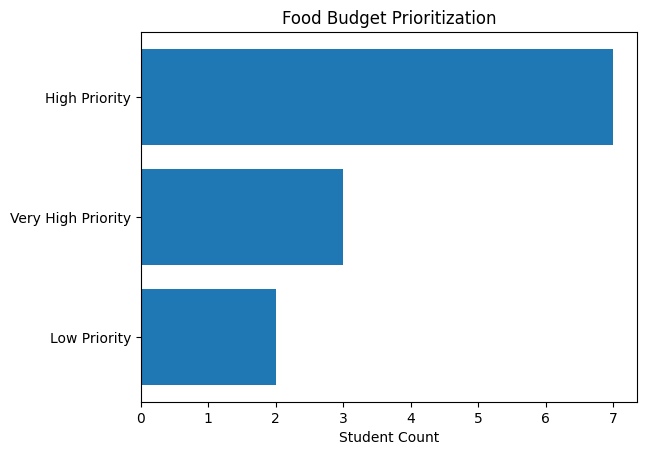

In [80]:
food_alloc = df[df['dorm_residency'] == 'No'].groupby('food_allocation_prioritization').size().reset_index()
food_alloc.set_index('food_allocation_prioritization', drop=True, inplace=True)
food_alloc.columns = ['count']
food_prio_data = sorted(zip(food_alloc.index, food_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*food_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Food Budget Prioritization')
plt.show()

#### Transportation Allocation Prioritization

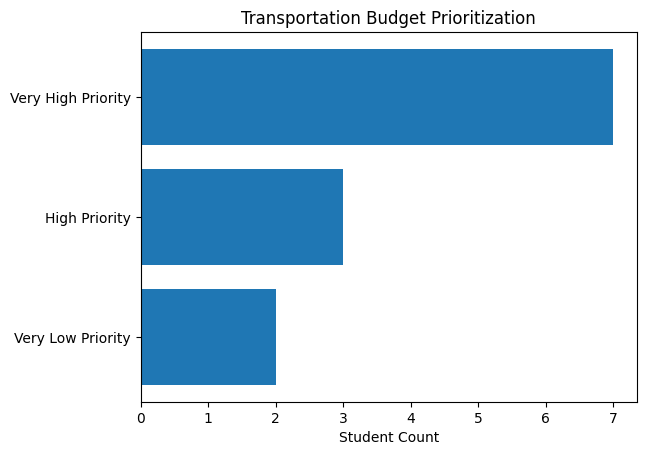

In [81]:
transpo_alloc = df[df['dorm_residency'] == 'No'].groupby('transportation_allocation_prioritization').size().reset_index()
transpo_alloc.set_index('transportation_allocation_prioritization', drop=True, inplace=True)
transpo_alloc.columns = ['count']
transpo_prio_data = sorted(zip(transpo_alloc.index, transpo_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*transpo_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Transportation Budget Prioritization')
plt.show()

#### Personal Expense Allocation Prioritization

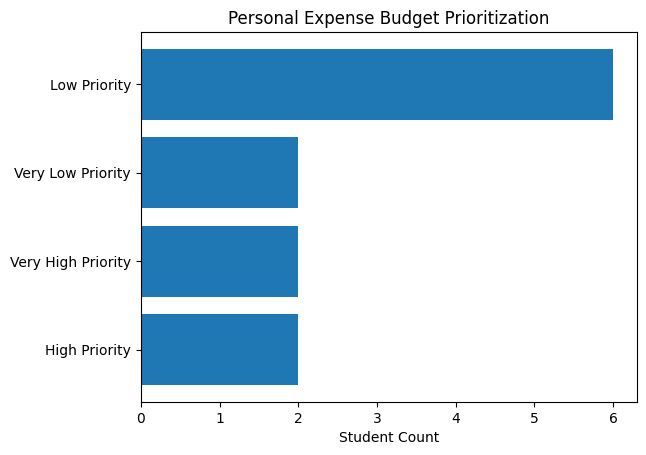

In [82]:
personal_expense_alloc = df[df['dorm_residency'] == 'No'].groupby('personal_expense_allocation_prioritization').size().reset_index()
personal_expense_alloc.set_index('personal_expense_allocation_prioritization', drop=True, inplace=True)
personal_expense_alloc.columns = ['count']
personal_expense_prio_data = sorted(zip(personal_expense_alloc.index, personal_expense_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*personal_expense_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Personal Expense Budget Prioritization')
plt.show()

#### Miscellaneous Allocation Prioritization

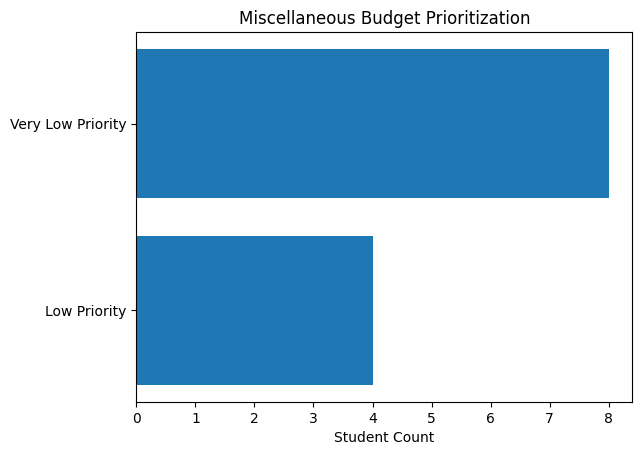

In [83]:
misc_alloc = df[df['dorm_residency'] == 'No'].groupby('misc_allocation_prioritization').size().reset_index()
misc_alloc.set_index('misc_allocation_prioritization', drop=True, inplace=True)
misc_alloc.columns = ['count']
misc_prio_data = sorted(zip(misc_alloc.index, misc_alloc['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*misc_prio_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Miscellaneous Budget Prioritization')
plt.show()

As we can see from the graphs shown above, there is a similarity between the prioritization done by dormers and non-dormers.

## Weekly Savings

In [84]:
cross_tab_weekly_savings_vs_residency = df.groupby([
    'dorm_residency',
    'weekly_savings',
]).size().reset_index()
cross_tab_weekly_savings_vs_residency.columns = ['dorm_residency', 'weekly_savings', 'count']

In [85]:
cross_tab_weekly_savings_vs_residency

,dorm_residency,weekly_savings,count
0,No,No,2
1,No,Yes,10
2,Yes,No,3
3,Yes,Yes,10


### Dormers

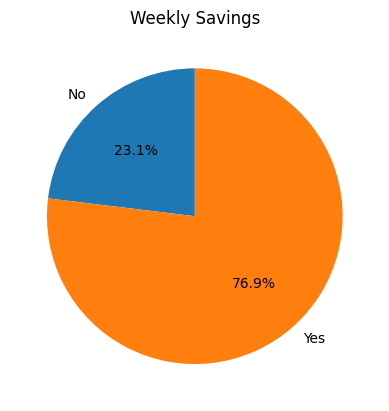

In [89]:
plt.pie(x=df[df['dorm_residency'] == 'Yes'].groupby(['weekly_savings']).size(),
        labels=['No', 'Yes'],  autopct='%1.1f%%', startangle=90)
plt.title("Weekly Savings")
plt.show()

### Non-dormers

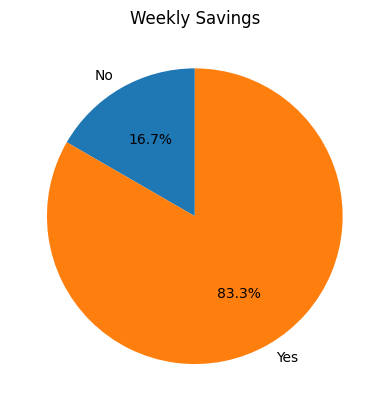

In [90]:
plt.pie(x=df[df['dorm_residency'] == 'No'].groupby(['weekly_savings']).size(),
        labels=['No', 'Yes'],  autopct='%1.1f%%', startangle=90)
plt.title("Weekly Savings")
plt.show()

## Budgetting System Satisfaction

We can do a quick cross tabulation for the budgetting system satisfaction of both dormers and non-dormers.

In [65]:
cross_tab_weekly_budgetting_system_vs_residency = df.groupby([
    'dorm_residency',
    'budgetting_system_satisfaction',
]).size().reset_index()
cross_tab_weekly_budgetting_system_vs_residency.columns = ['dorm_residency', 'budgetting_system_satisfaction', 'count']

In [66]:
cross_tab_weekly_budgetting_system_vs_residency

,dorm_residency,budgetting_system_satisfaction,count
0,No,Completely Satisfied,4
1,No,Moderately Satisfied,7
2,No,Not Satisfied,1
3,Yes,Completely Satisfied,3
4,Yes,Moderately Satisfied,8
5,Yes,Not Satisfied,2


### Dormers

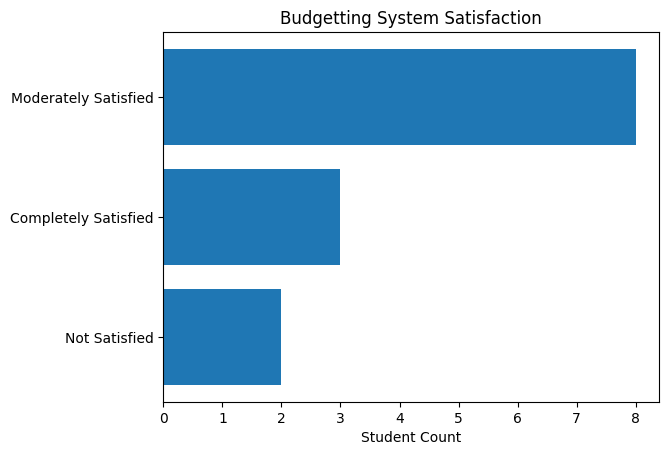

In [93]:
budgetting_satisfaction = df[df['dorm_residency'] == 'Yes'].groupby('budgetting_system_satisfaction').size().reset_index()
budgetting_satisfaction.set_index('budgetting_system_satisfaction', drop=True, inplace=True)
budgetting_satisfaction.columns = ['count']
budgetting_satisfaction_data = sorted(zip(budgetting_satisfaction.index, budgetting_satisfaction['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*budgetting_satisfaction_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Budgetting System Satisfaction')
plt.show()

### Non-Dormers

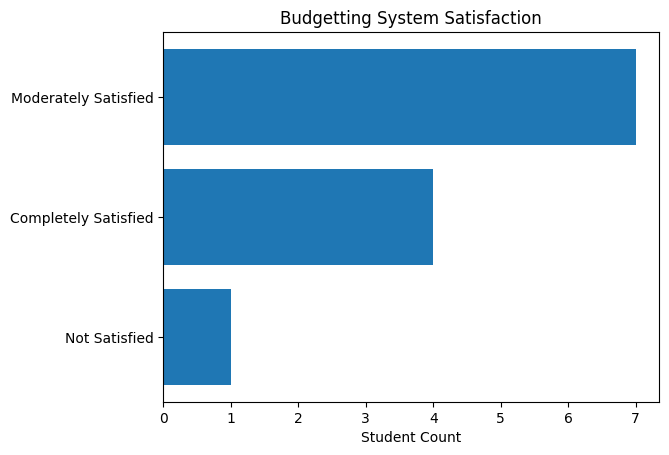

In [94]:
budgetting_satisfaction = df[df['dorm_residency'] == 'No'].groupby('budgetting_system_satisfaction').size().reset_index()
budgetting_satisfaction.set_index('budgetting_system_satisfaction', drop=True, inplace=True)
budgetting_satisfaction.columns = ['count']
budgetting_satisfaction_data = sorted(zip(budgetting_satisfaction.index, budgetting_satisfaction['count']), key=lambda x: x[1], reverse=False)
categs, values = zip(*budgetting_satisfaction_data)
plt.barh(categs, values)
plt.xlabel('Student Count')
plt.title('Budgetting System Satisfaction')
plt.show()

As we can see, most of the students of Stat 101 WFR 2 are moderately satisfied with their current budgetting system. Factors and reasons cannot be explained by the current data the researchers have currently on-hold.

## Conclusion

As a conclusion, I'm tired and sleepy. I've been writing this for almost three hours na. WOOHOO ansaya ... pero legit ansaya : DDDDDDDD

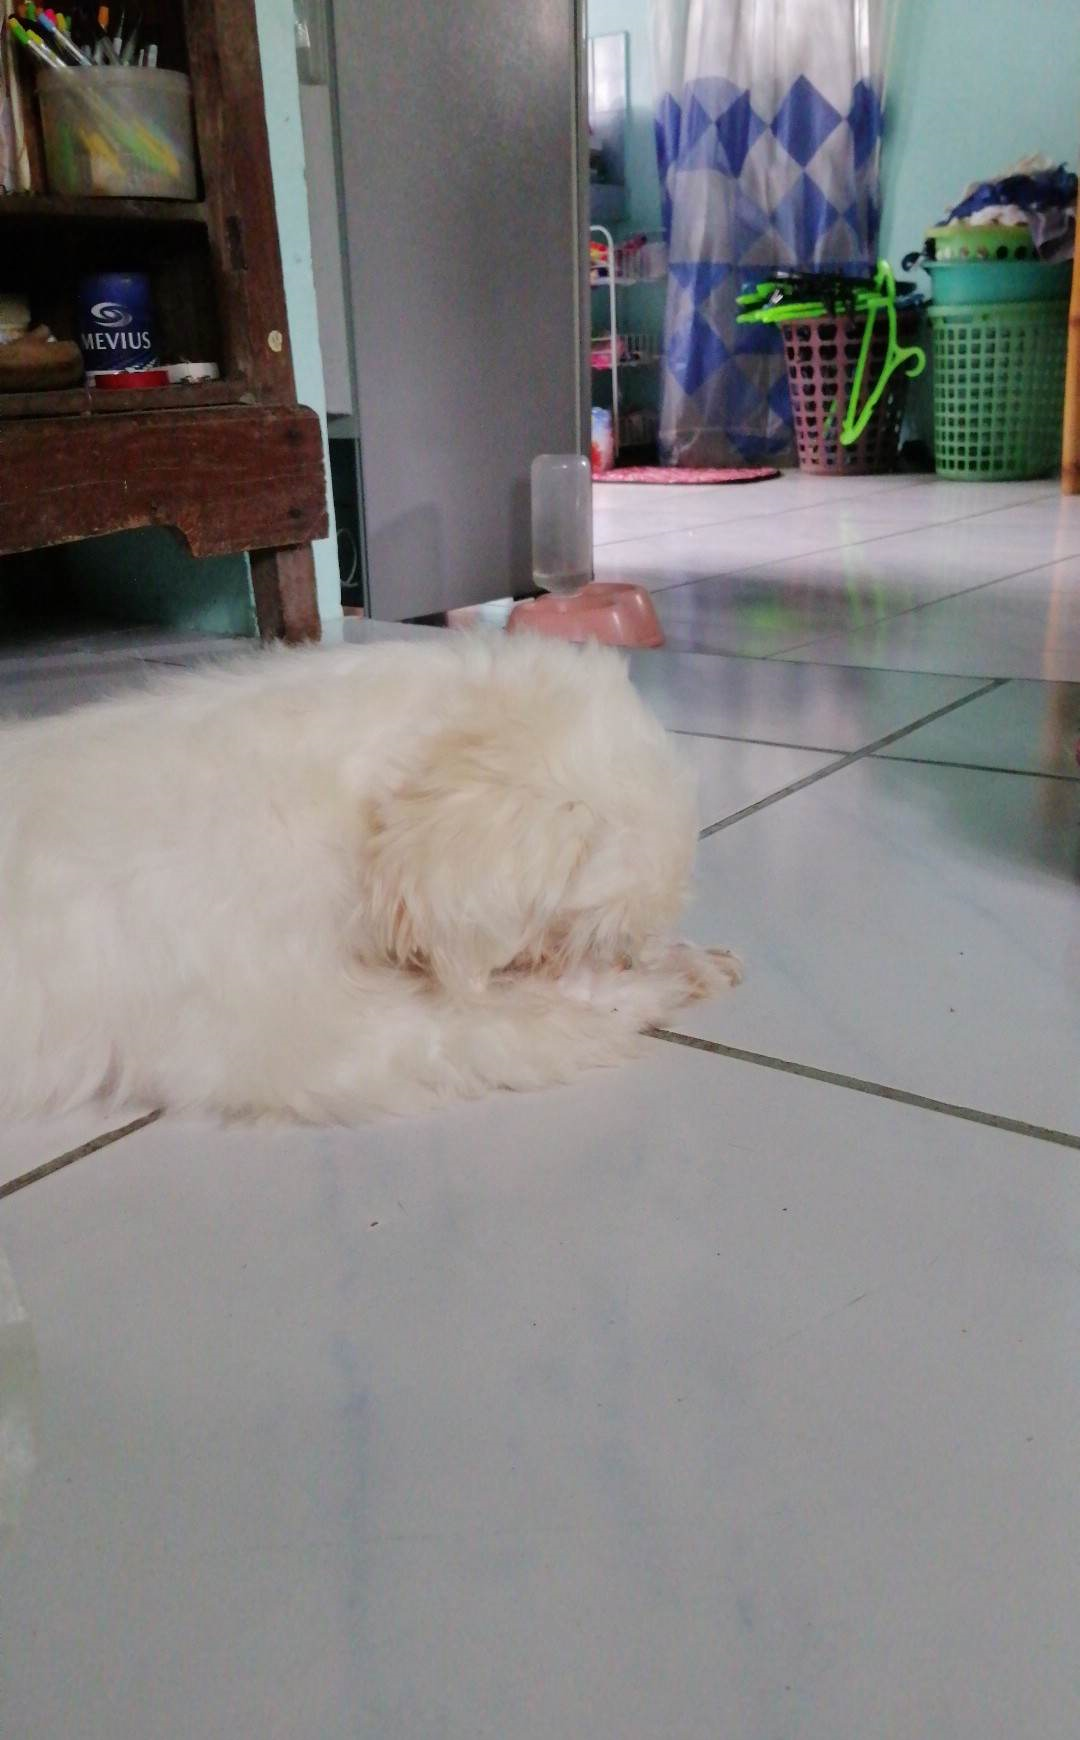